In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import datetime

In [3]:
load_ext tensorboard

In [2]:
(train_img, train_labels), (test_img, test_labels) = datasets.mnist.load_data()

In [4]:
train_img, test_img = train_img / 255.0, test_img / 255.0

In [5]:
train_img.shape

(60000, 28, 28)

In [6]:
train_img = train_img.reshape((train_img.shape[0], 28, 28, 1))

In [7]:
train_img.shape

(60000, 28, 28, 1)

In [8]:
test_img = test_img.reshape((test_img.shape[0], 28, 28, 1))

In [9]:
model = models.Sequential()

In [10]:
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape = (28, 28, 1)))

In [11]:
model.add(layers.MaxPooling2D((2, 2)))

In [12]:
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

In [13]:
model.add(layers.MaxPooling2D((2, 2)))

In [14]:
model.add(layers.Flatten())

In [15]:
model.add(layers.Dense(128, activation='relu'))

In [16]:
model.add(layers.Dense(10, activation='softmax'))

In [17]:
model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

In [22]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir='/log', histogram_freq=1)

In [23]:
history = model.fit(train_img, train_labels, epochs=10, validation_data=(test_img, test_labels), callbacks=[tensorboard_callback])

Epoch 1/10


C:\Users\akim5\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\backend.py:5612: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


1875/1875 [==============================] - 30s 15ms/step - loss: 0.1264 - accuracy: 0.9624 - val_loss: 0.0452 - val_accuracy: 0.9854
Epoch 2/10
1875/1875 [==============================] - 28s 15ms/step - loss: 0.0416 - accuracy: 0.9874 - val_loss: 0.0348 - val_accuracy: 0.9897
Epoch 3/10
1875/1875 [==============================] - 29s 16ms/step - loss: 0.0286 - accuracy: 0.9909 - val_loss: 0.0317 - val_accuracy: 0.9890
Epoch 4/10
1875/1875 [==============================] - 27s 14ms/step - loss: 0.0201 - accuracy: 0.9937 - val_loss: 0.0415 - val_accuracy: 0.9874
Epoch 5/10
1875/1875 [==============================] - 27s 14ms/step - loss: 0.0161 - accuracy: 0.9947 - val_loss: 0.0264 - val_accuracy: 0.9924
Epoch 6/10
1875/1875 [==============================] - 27s 14ms/step - loss: 0.0115 - accuracy: 0.9962 - val_loss: 0.0321 - val_accuracy: 0.9907
Epoch 7/10
1875/1875 [==============================] - 27s 14ms/step - loss: 0.0096 - accuracy: 0.9970 - val_loss: 0.0287 - val_accura

In [24]:
test_loss, test_acc = model.evaluate(test_img, test_labels)

313/313 [==============================] - 2s 7ms/step - loss: 0.0455 - accuracy: 0.9903


In [25]:
test_acc

0.9902999997138977

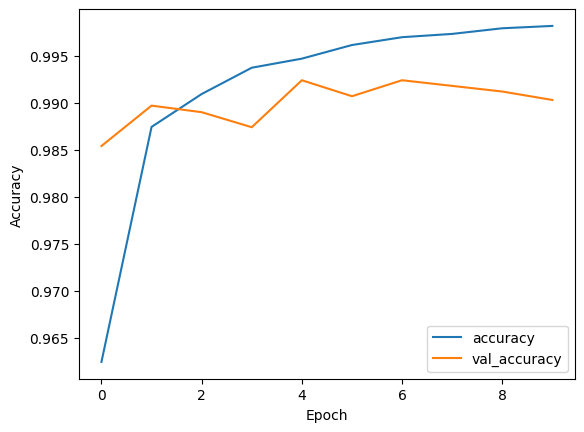

In [26]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()